<a href="https://colab.research.google.com/github/pratiksha2811/Heart-disease-prediction/blob/master/HONORS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart (1).csv', 'sample_data']


In [155]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [156]:
df=pd.read_csv(r"/content/heart (1).csv")

In [157]:
df.shape

(303, 14)

In [158]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [159]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [161]:
df["target"].describe()


count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [162]:
df["target"].unique()


array([1, 0])

In [163]:
print(df.corr()["target"].abs().sort_values(ascending=False))


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [164]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [165]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [166]:
df["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

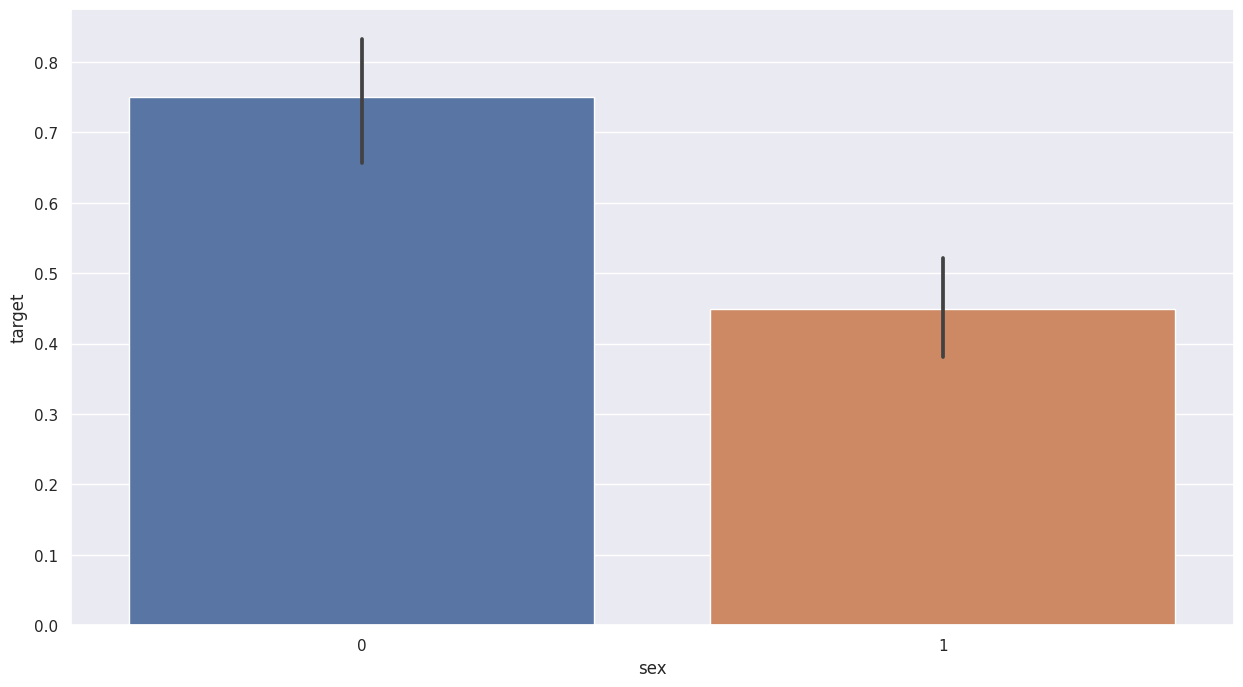

In [167]:
sns.barplot(x=df.sex,y=df.target)

In [168]:
df["cp"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp', ylabel='target'>

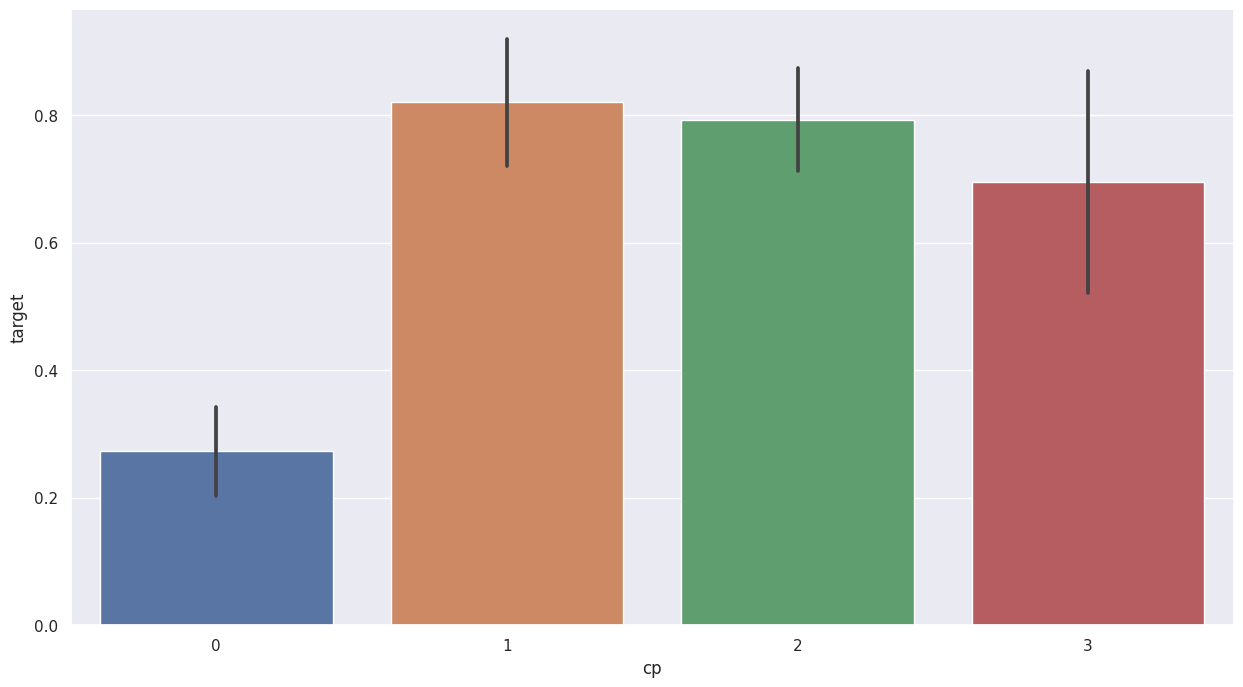

In [169]:
sns.barplot(x=df.cp,y=df.target)

In [170]:
df["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [171]:
df["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

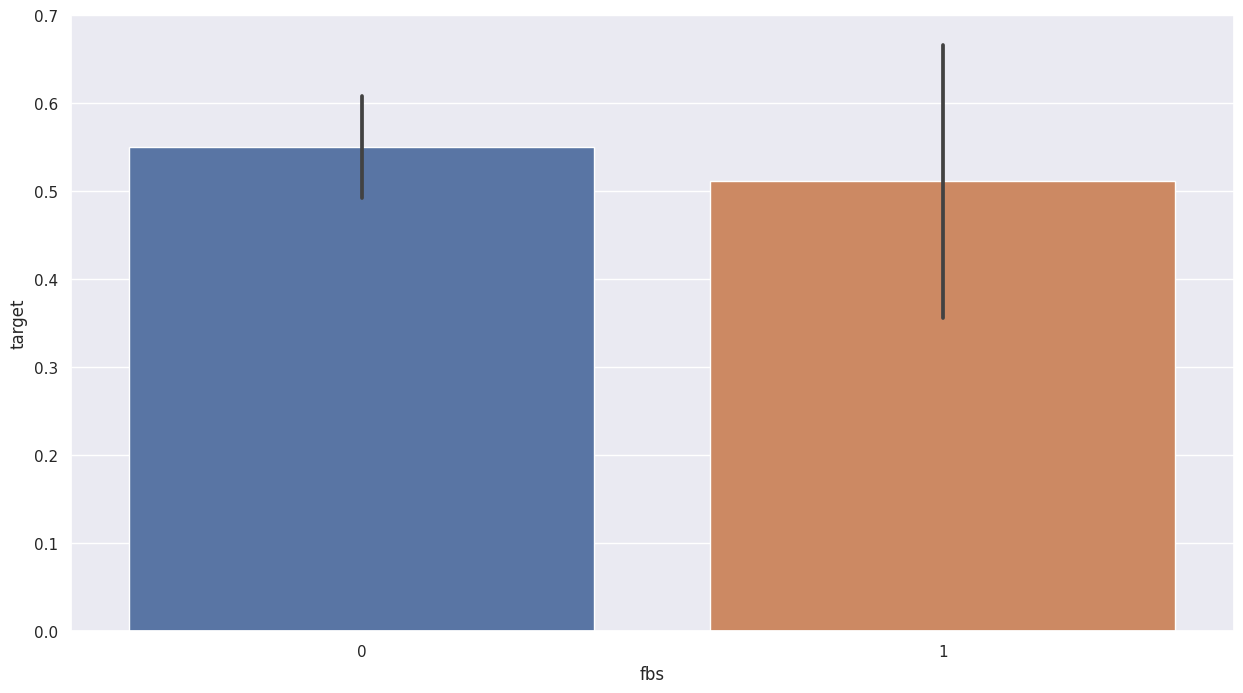

In [172]:
sns.barplot(x=df.fbs,y=df.target)

In [173]:
df["restecg"].unique()


array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

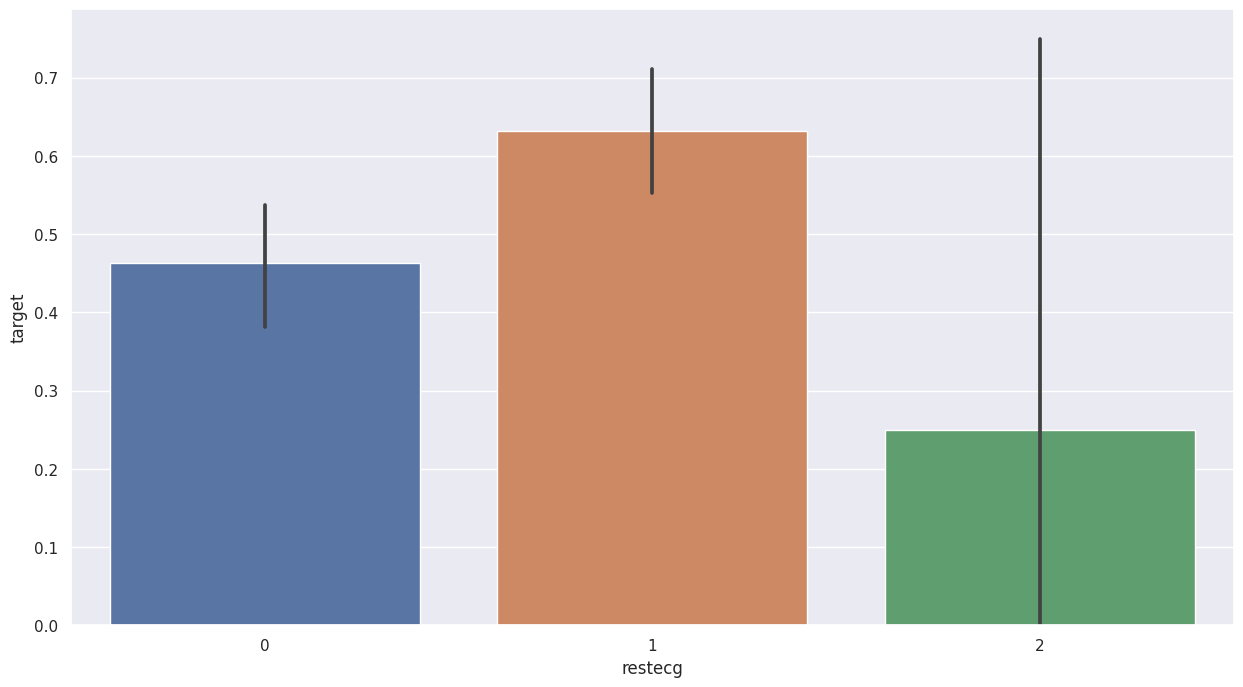

In [174]:
sns.barplot(x=df.restecg,y=df.target)

Text(0.5, 1.0, 'Correlation Matrix')

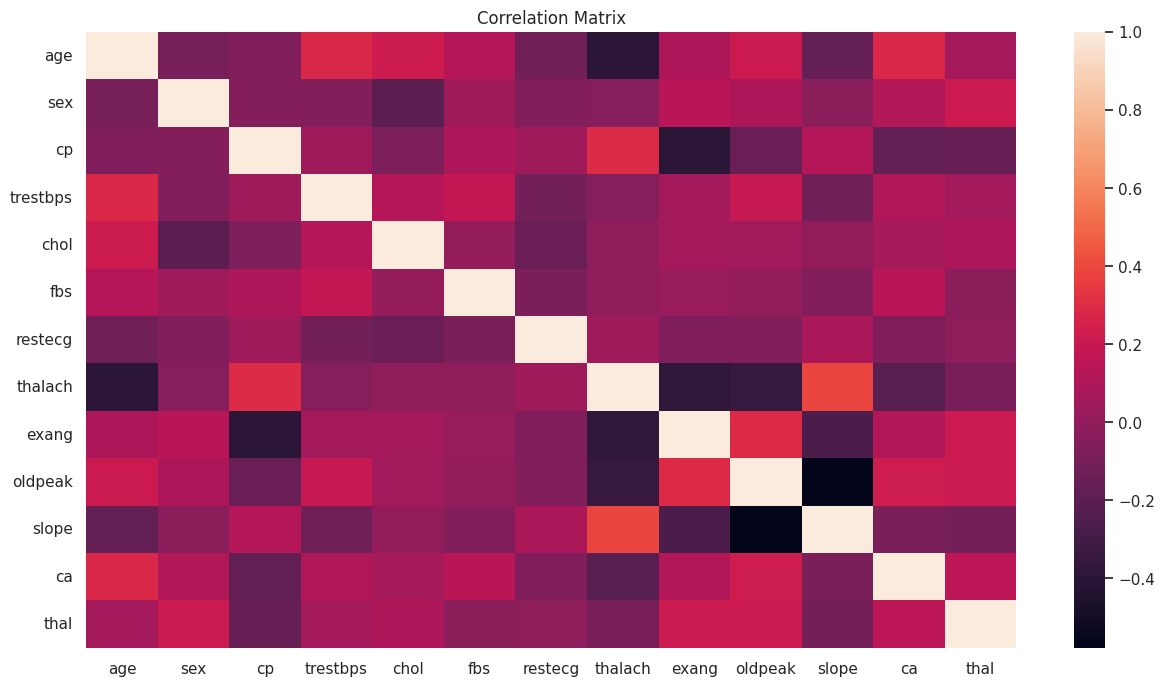

In [175]:
sns.heatmap(df.drop(columns='target').corr()).set_title('Correlation Matrix')


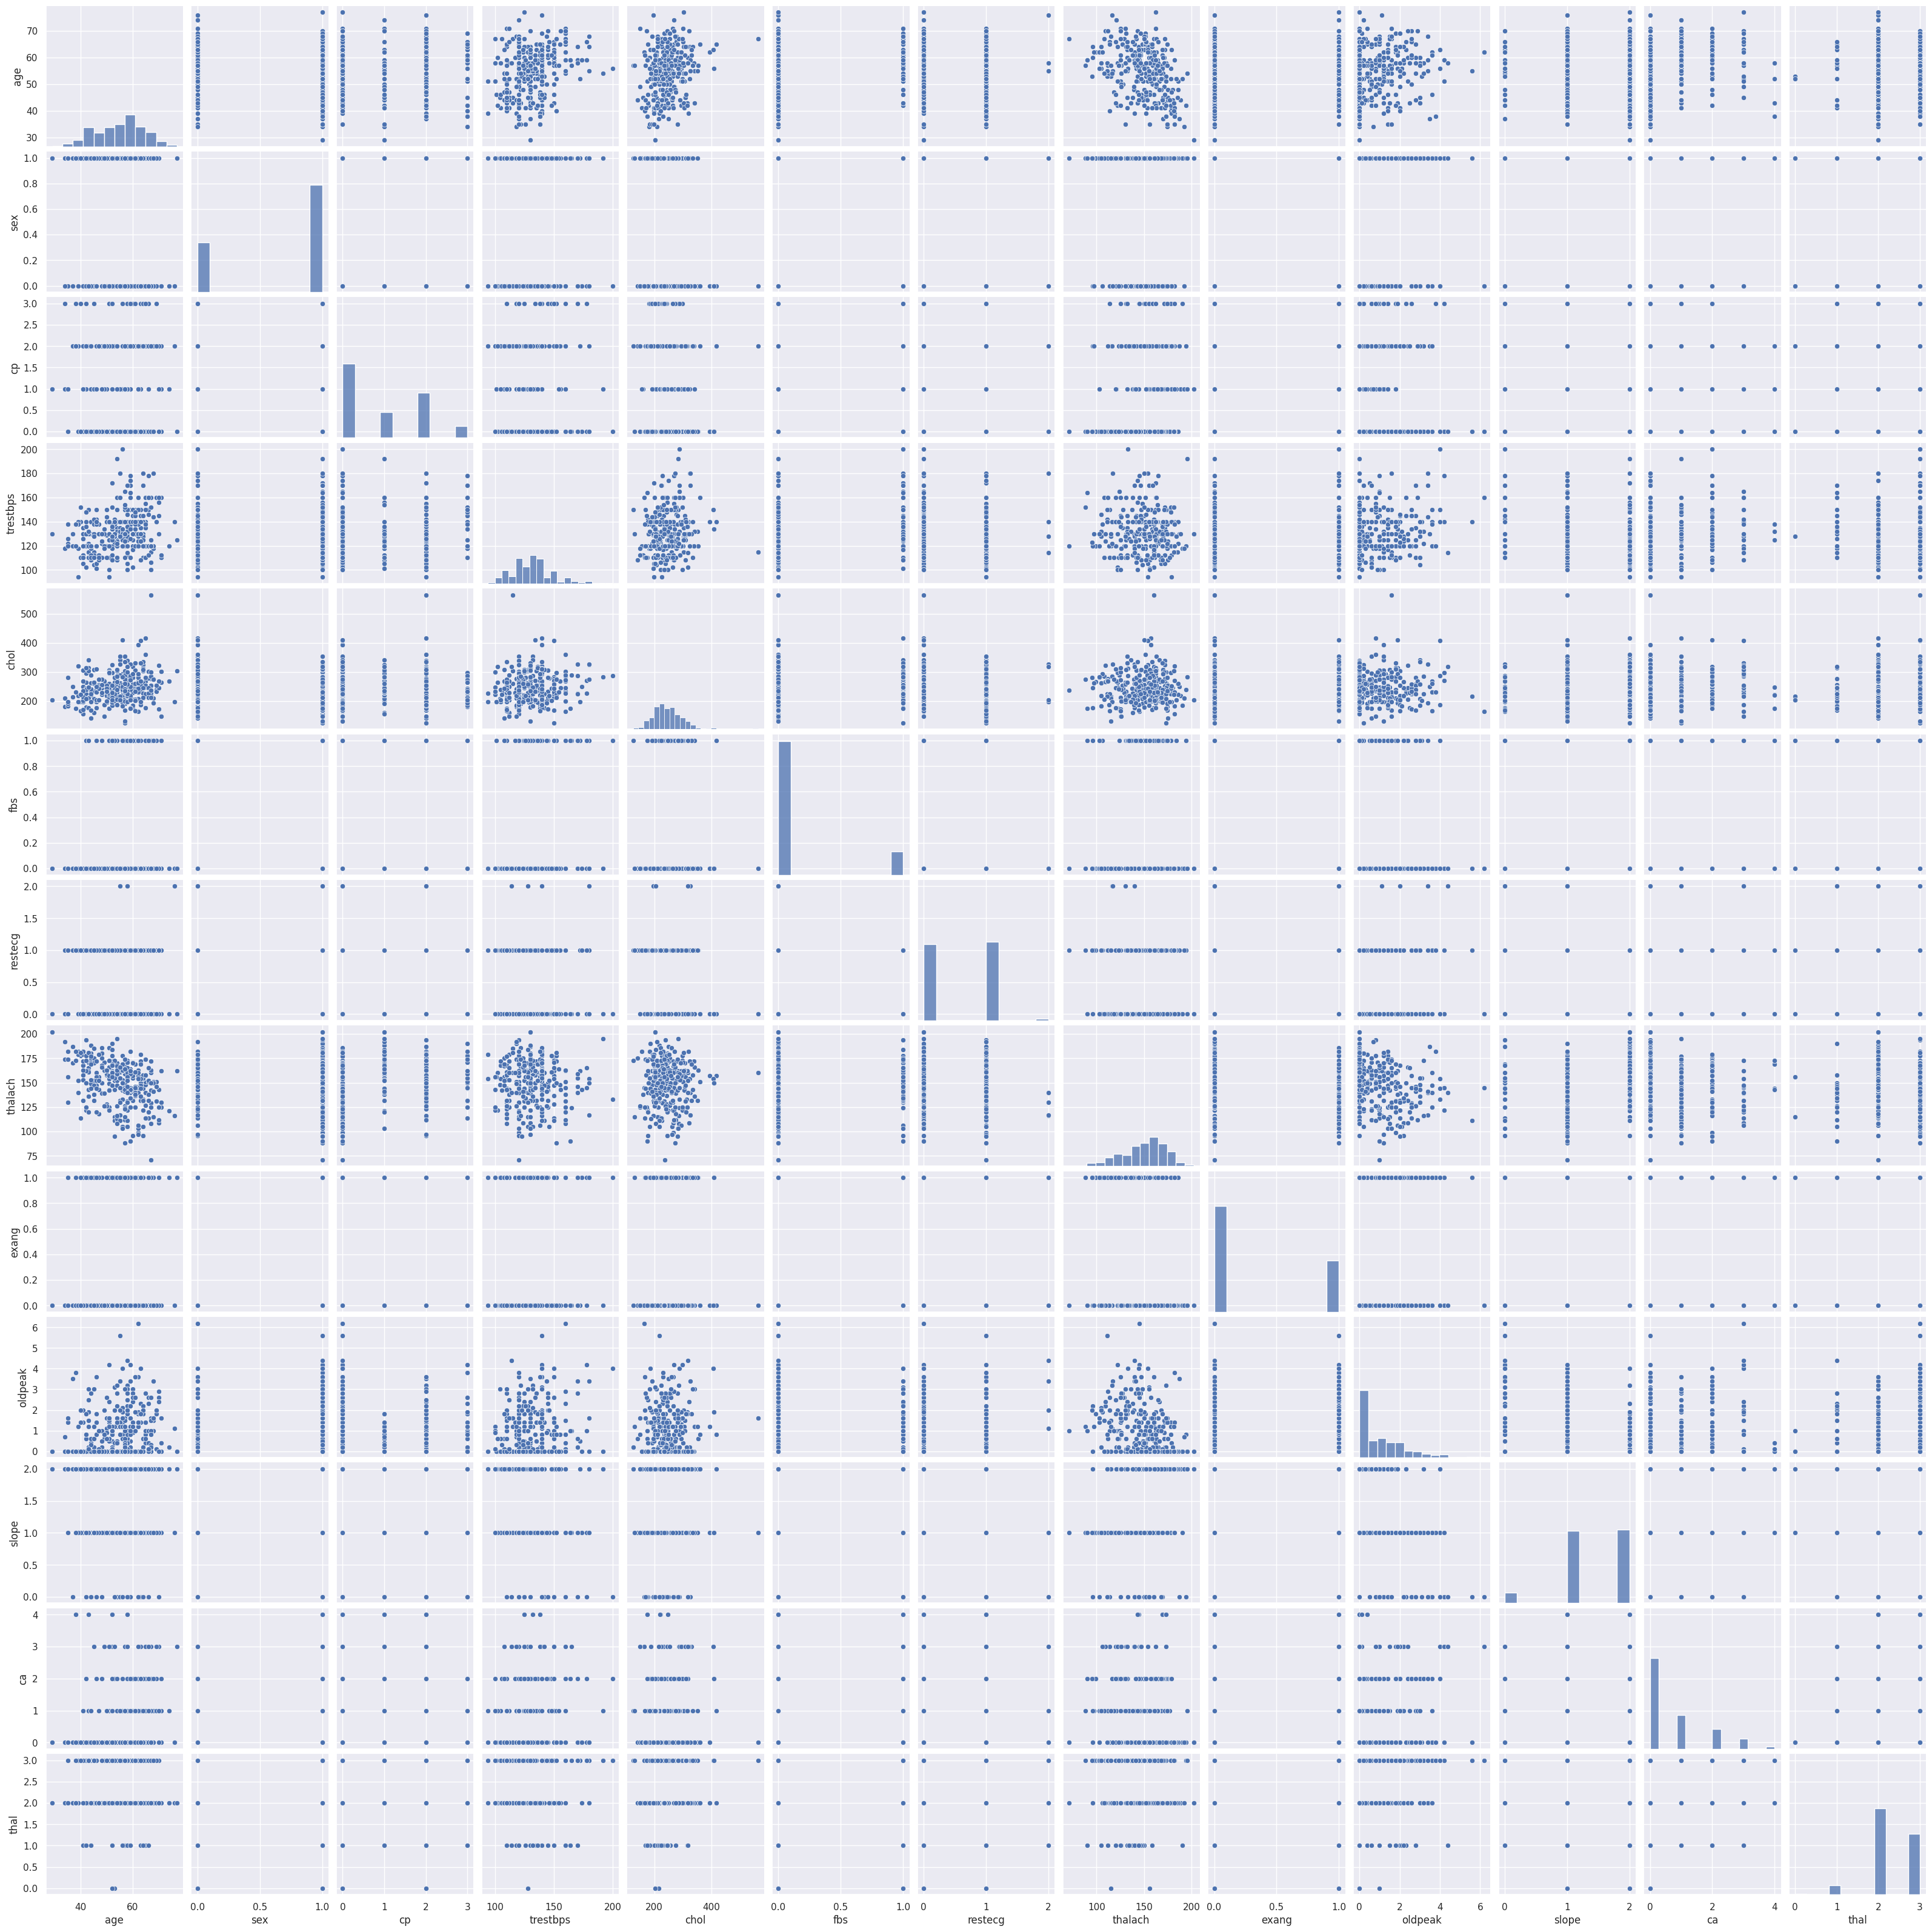

In [176]:
sns.pairplot(df.drop(columns='target'))

Text(0.5, 1.0, 'Lineplot')

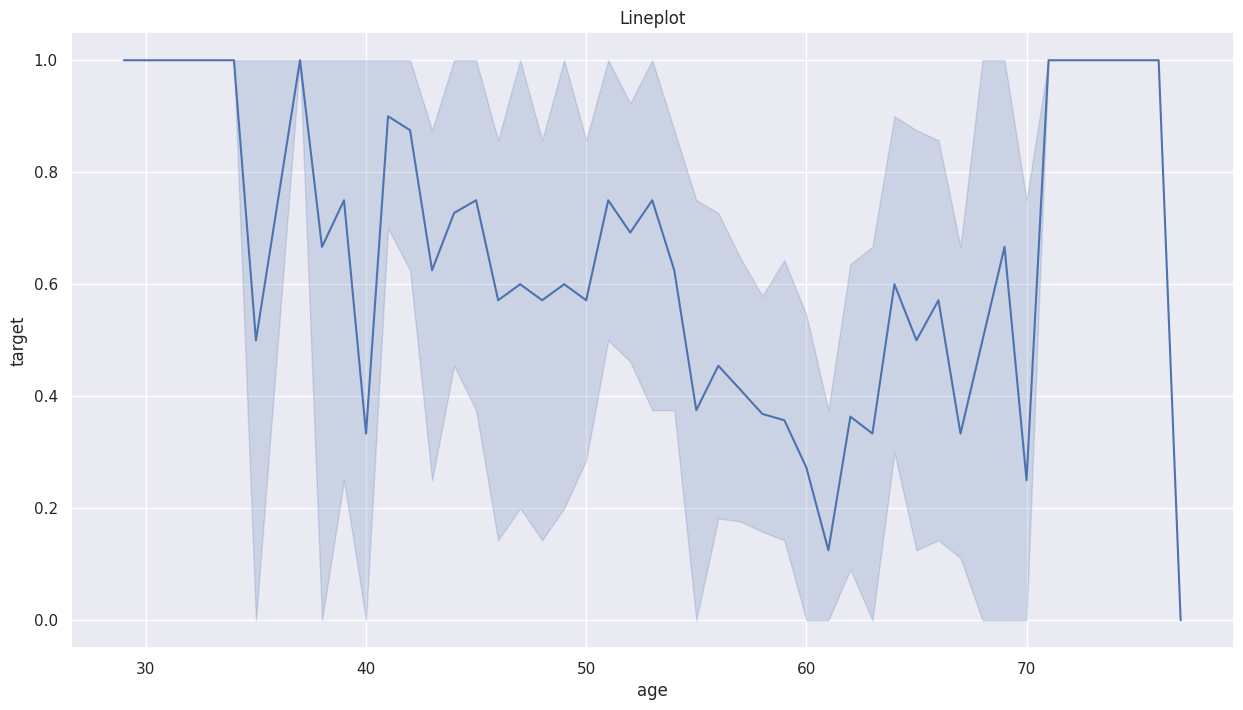

In [177]:
sns.lineplot(data=df,x='age',y='target').set_title('Lineplot')

<Axes: xlabel='age', ylabel='target'>

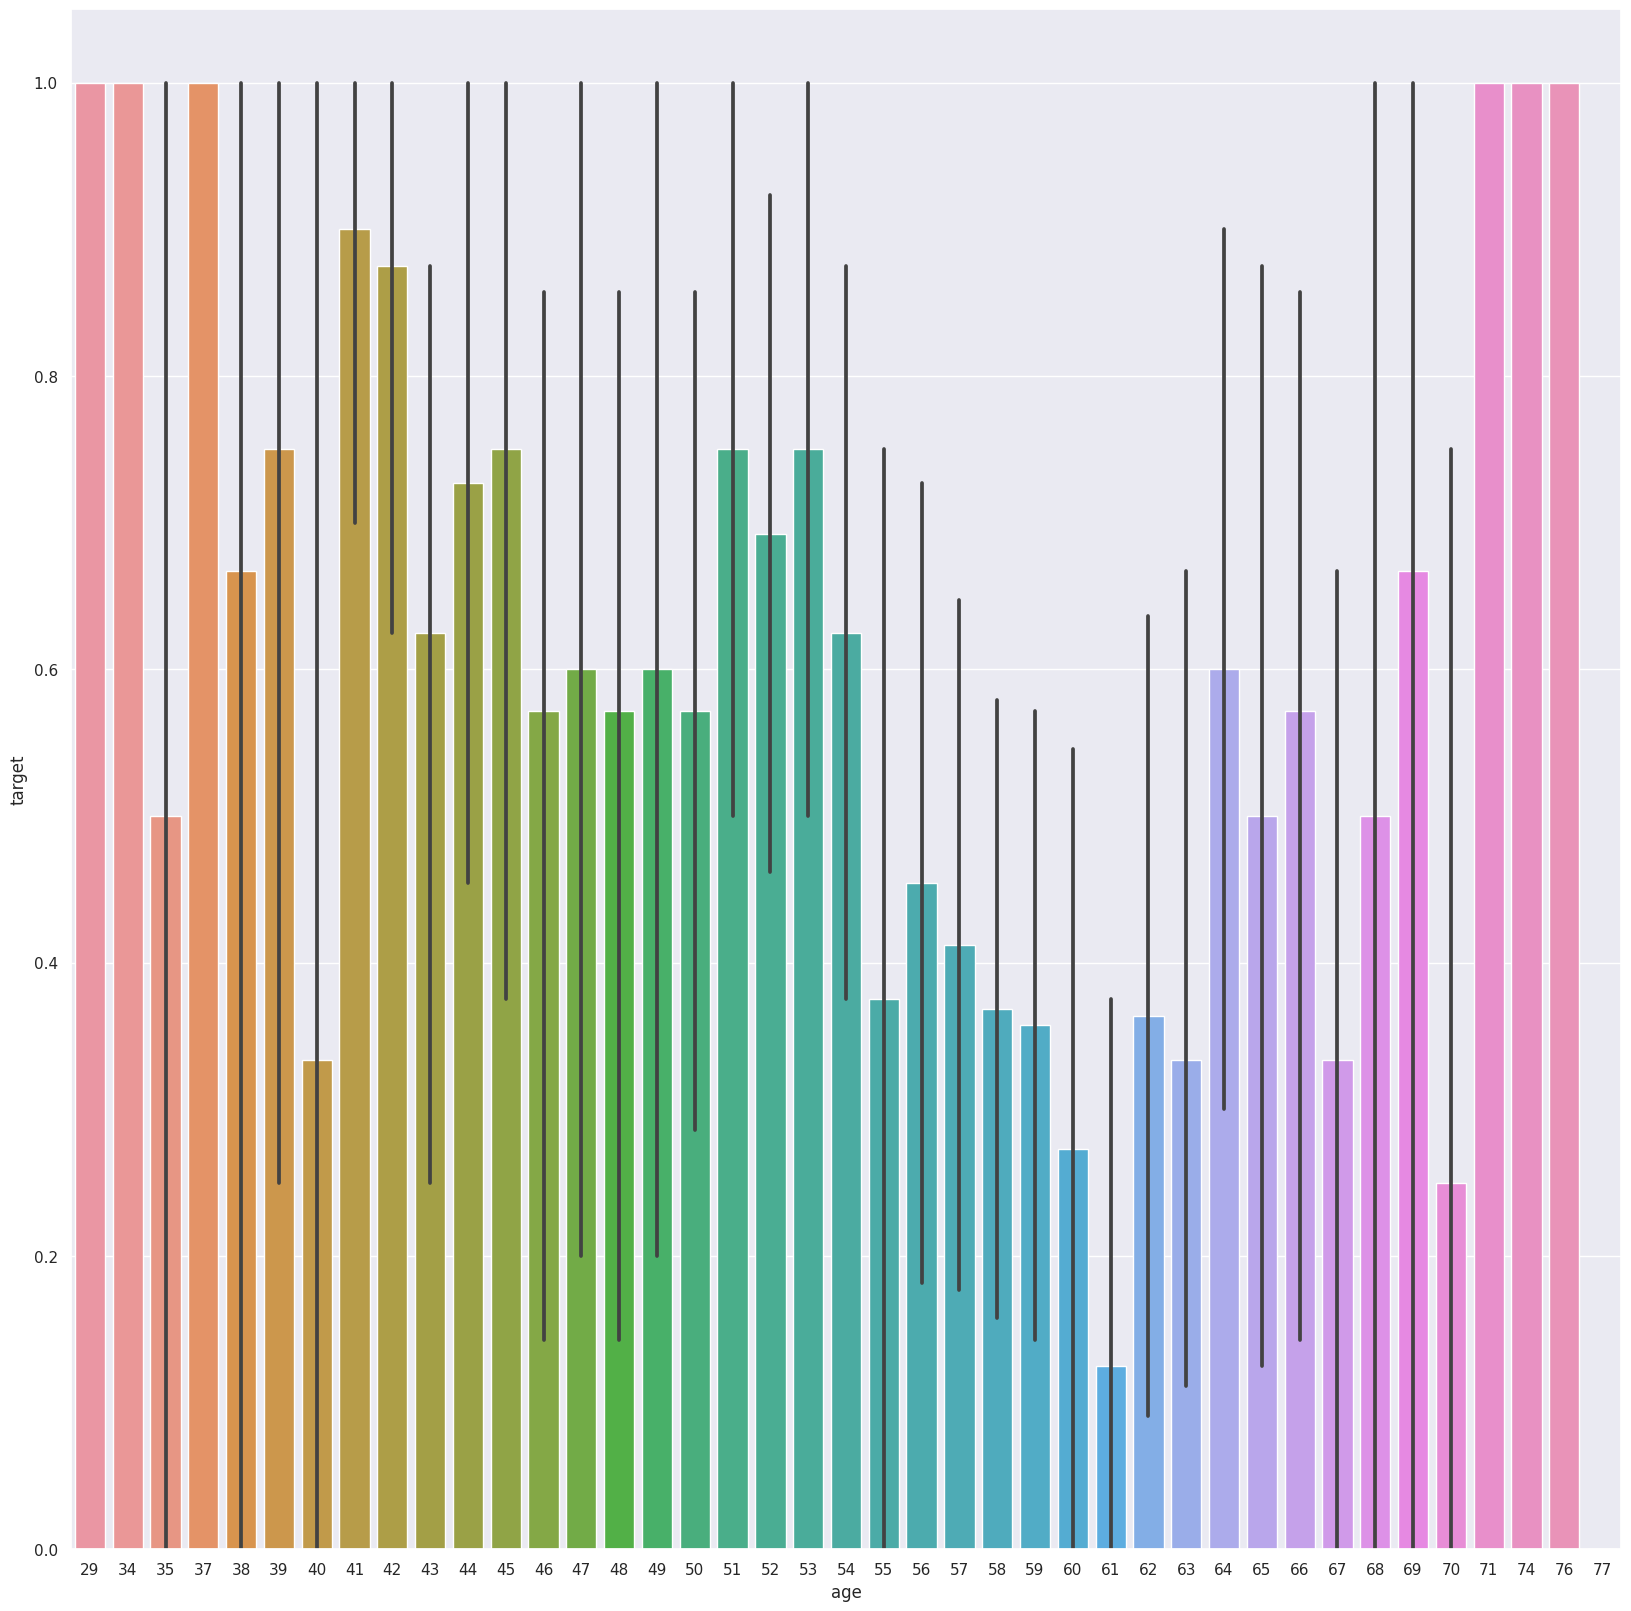

In [178]:
plt.figure(figsize=(20,20))
sns.barplot(data=df,y='target',x='age')

<Axes: xlabel='thal', ylabel='target'>

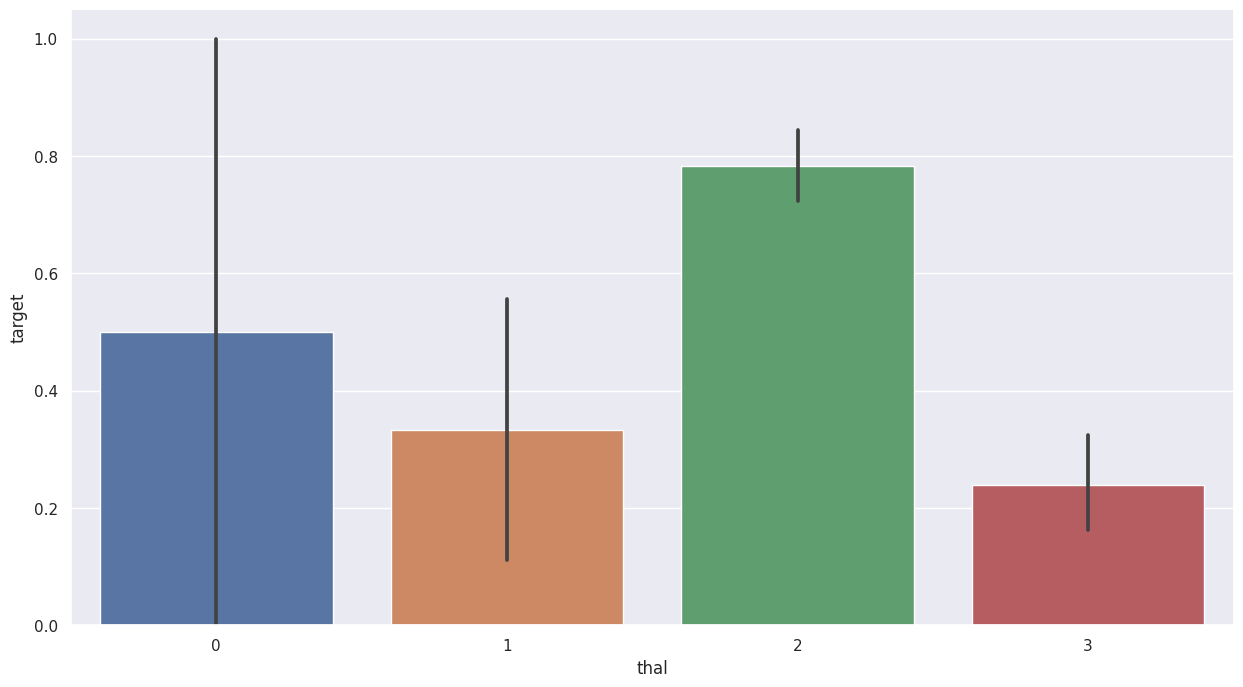

In [179]:
sns.barplot(data=df,y='target',x='thal')


In [180]:
predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [181]:
X_train.shape


(242, 13)

In [182]:
X_test.shape


(61, 13)

In [183]:
Y_train.shape


(242,)

In [184]:
Y_test.shape

(61,)

In [185]:
lr=LogisticRegression()
model1=lr.fit(X_train,Y_train)
prediction1=model1.predict(X_test)

In [186]:
cm1=confusion_matrix(Y_test,prediction1)
cm1

score_lr = round(accuracy_score(prediction1,Y_test)*100,2)
print("Accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
print(classification_report(Y_test, prediction1))


Accuracy score achieved using Logistic Regression is: 85.25 %
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [187]:
svm=SVC()
model2=svm.fit(X_train,Y_train)
prediction2=model2.predict(X_test)

In [188]:
cm2= confusion_matrix(Y_test,prediction2)
cm2
score_svm = round(accuracy_score(prediction2,Y_test)*100,2)
print("Accuracy score achieved using SVM is: "+str(score_svm)+" %")
print(classification_report(Y_test, prediction2))

Accuracy score achieved using SVM is: 68.85 %
              precision    recall  f1-score   support

           0       0.72      0.48      0.58        27
           1       0.67      0.85      0.75        34

    accuracy                           0.69        61
   macro avg       0.70      0.67      0.67        61
weighted avg       0.70      0.69      0.68        61



In [189]:
KNN = KNeighborsClassifier()
model3 = KNN.fit(X_train, Y_train)
prediction3 = model3.predict(X_test)


In [190]:
cm3= confusion_matrix(Y_test, prediction3)
cm3
score_knn = round(accuracy_score(prediction3,Y_test)*100,2)
print("Accuracy score achieved using KNN is: "+str(score_knn)+" %")
print(classification_report(Y_test, prediction3))

Accuracy score achieved using KNN is: 63.93 %
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



In [191]:
rfc=RandomForestClassifier()
model4 = rfc.fit(X_train, Y_train)
prediction4 = model4.predict(X_test)


In [192]:
cm4= confusion_matrix(Y_test, prediction4)
cm4
score_rfc = round(accuracy_score(prediction4,Y_test)*100,2)
print("Accuracy score achieved using Random Forest Classifier is: "+str(score_rfc)+" %")
print(classification_report(Y_test, prediction4))

Accuracy score achieved using Random Forest Classifier is: 83.61 %
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [193]:
scores=[score_lr,score_svm,score_knn,score_rfc]
algorithms=["Logistic Regression","Support Vector Machine","K-Nearest Neighbours","Random Forest Classifier"]
for i in range(len(algorithms)):
  print('Accuracy achieved using'+algorithms[i]+': '+str(scores[i])+" %")



Accuracy achieved usingLogistic Regression: 85.25 %
Accuracy achieved usingSupport Vector Machine: 68.85 %
Accuracy achieved usingK-Nearest Neighbours: 63.93 %
Accuracy achieved usingRandom Forest Classifier: 83.61 %


<Axes: title={'center': 'Accuracies Obtained:'}, xlabel='Algorithms', ylabel='Accuracy score'>

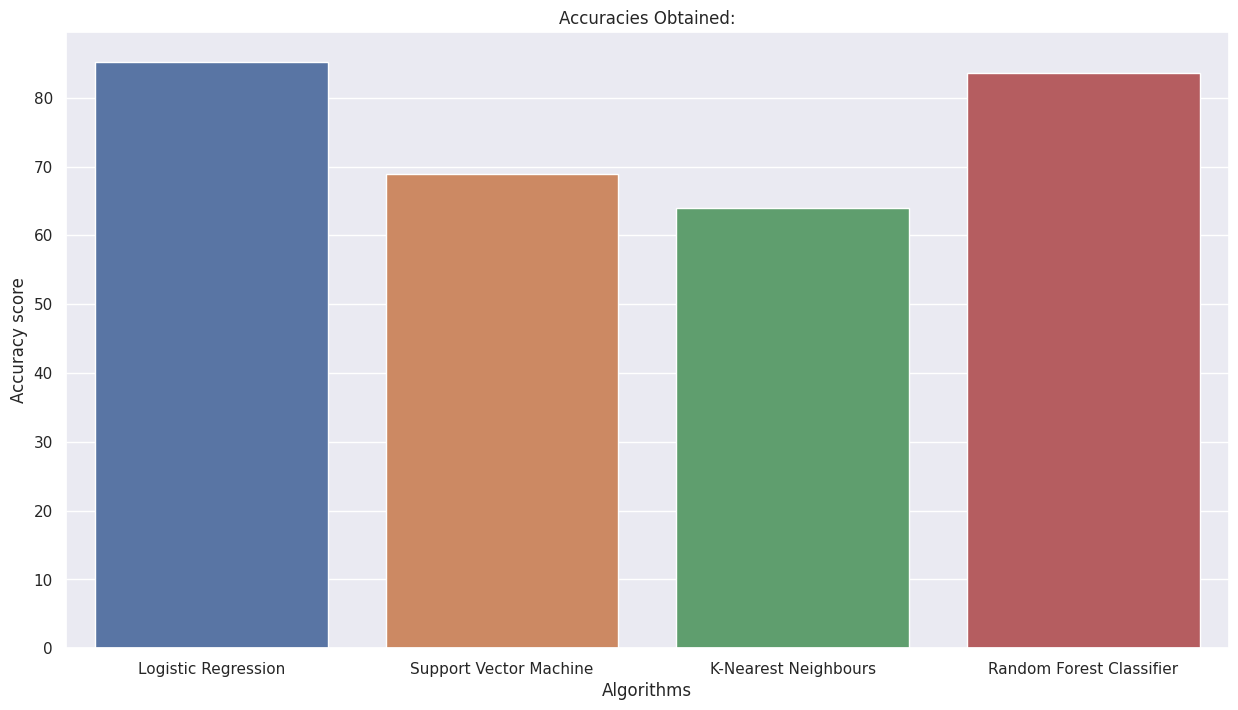

In [194]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title('Accuracies Obtained:')
x=algorithms
y=scores
sns.barplot(x=algorithms,y=scores)